In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [63]:
df = pd.read_csv('Datasets/Social_Network_Ads.csv')
df = df.iloc[:,2:]
print(df.head())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [64]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
print(x_train.shape, x_test.shape)

(280, 2) (120, 2)


In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(x_train)
x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)
print(sc.mean_) # Tells us the mean of each feature in the training set
print(sc.scale_) # Tells us the standard deviation of each feature in the training set, these parameters are learned via sc.fit(x_train).

[3.78642857e+01 6.98071429e+04]
[1.01999375e+01 3.45792870e+04]


In [66]:
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)
print(x_test_scaled.head())

x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
print(x_train_scaled.head())

        Age  EstimatedSalary
0 -0.771013         0.497201
1  0.013305        -0.572804
2 -0.280814         0.150172
3 -0.771013         0.265849
4 -0.280814        -0.572804
        Age  EstimatedSalary
0 -1.163172        -1.584970
1  2.170181         0.930987
2  0.013305         1.220177
3  0.209385         1.075582
4  0.405465        -0.486047


In [67]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


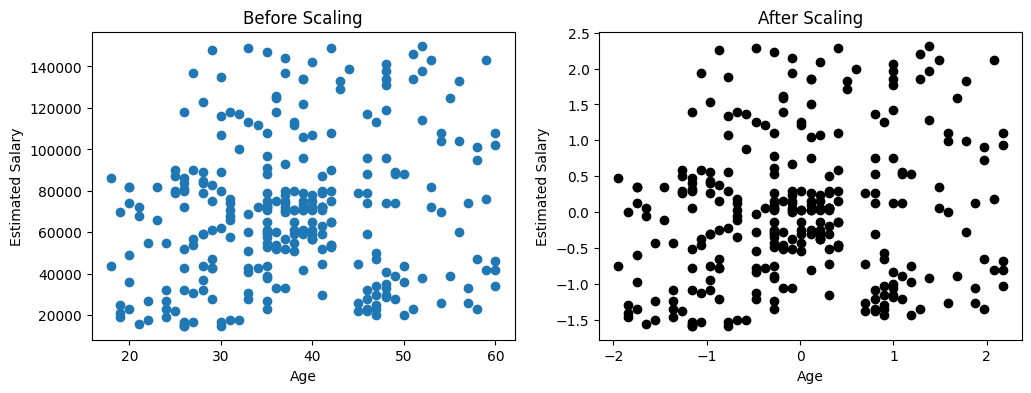

In [68]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')

ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color='black')
ax2.set_title('After Scaling')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated Salary')
plt.show()

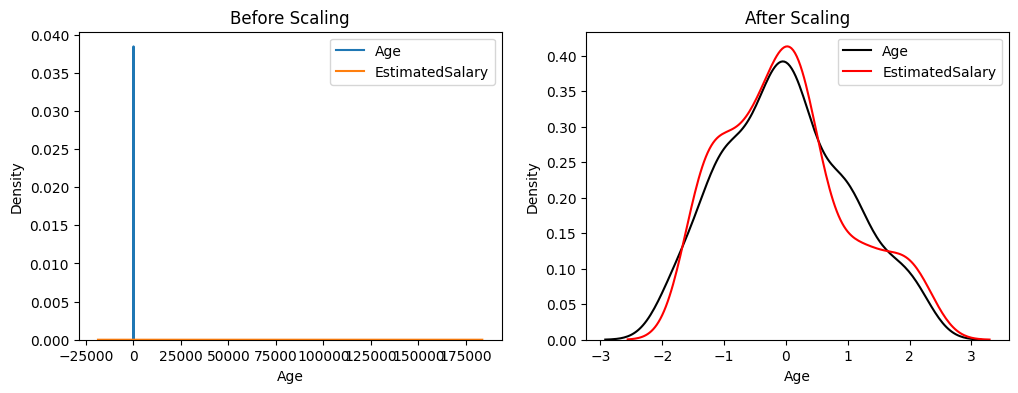

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2, color='black')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2, color='red')
ax1.legend(['Age', 'EstimatedSalary'])
ax2.legend(['Age', 'EstimatedSalary'])
plt.show()

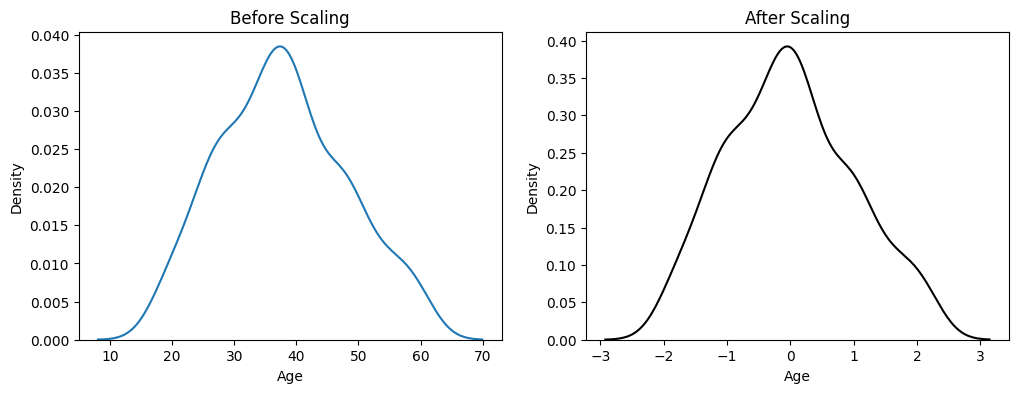

In [70]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2, color='black')
plt.show()

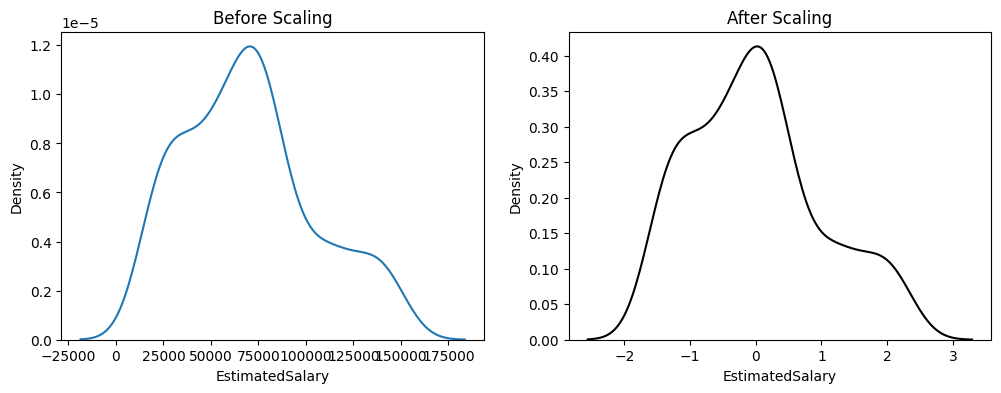

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

ax1.set_title('Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2, color='black')
plt.show()

In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [73]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)
from sklearn.metrics import accuracy_score
print('Accuracy before scaling: ', accuracy_score(y_test, y_pred))
print('Accuracy after scaling: ', accuracy_score(y_test, y_pred_scaled))
df.describe()

Accuracy before scaling:  0.875
Accuracy after scaling:  0.8666666666666667


,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [74]:
new_rows = pd.DataFrame({
    'Age':[5,90,95],
    'EstimatedSalary':[1000,250000,350000],
    'Purchased':[0,1,1]
})

df = pd.concat([df, new_rows], ignore_index=True)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


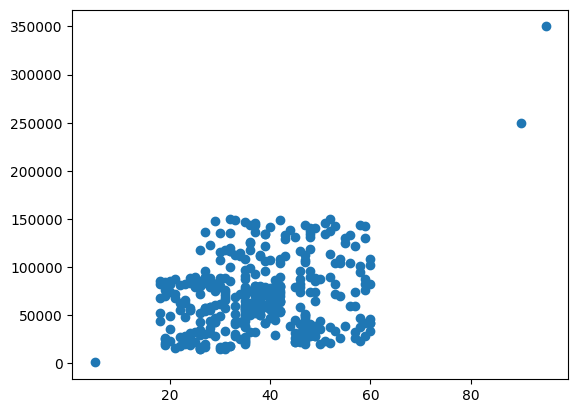

In [75]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'],test_size=0.3, random_state=0)

x_train.shape, x_test.shape

((282, 2), (121, 2))

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

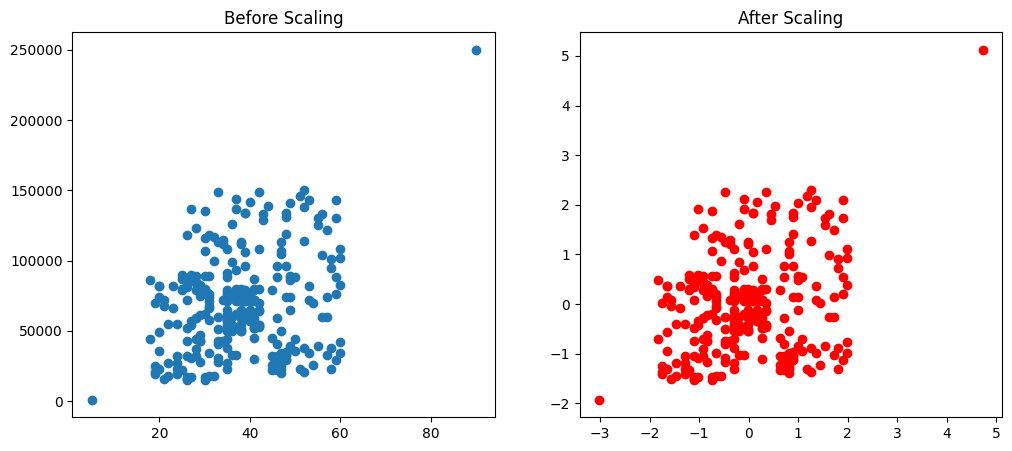

In [85]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()